In [639]:
import h5py
import numpy as np
import arviz as az
import matplotlib.pyplot as plt
import matplotlib.patches as pt
import utility_functions
import meshio
import evaluations


In [640]:
point = np.array([80, 150])

start = 0
end = 10000
start_mlda = 500
end_mlda = 10000

sample_paths = [
    '/home/anne/Masterarbeit/masterarbeit/results/samples_2d_rad_l0.h5',
    '/home/anne/Masterarbeit/masterarbeit/results/samples_2d_rad_l1.h5',
    '/home/anne/Masterarbeit/masterarbeit/results/samples_2d_rad_l2.h5']

samples = []

for i in range(len(sample_paths)):
    fin = h5py.File(sample_paths[i])
    samples.append(np.array( fin['/samples'][0:2] ))
    fin.close()

fin = h5py.File('/home/anne/Masterarbeit/masterarbeit/results/samples_2d_rad_mlda.h5')
mlda_samples = np.array( fin['/samples'][0:2] )
fin.close()


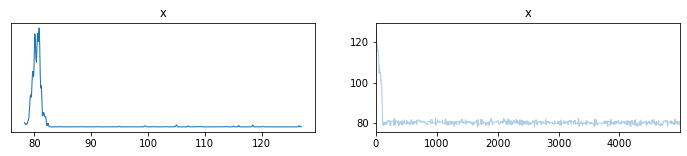

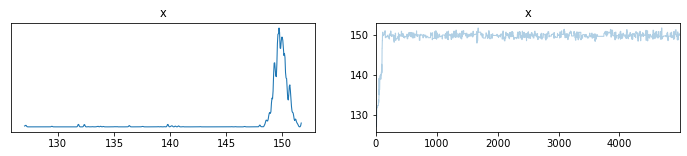

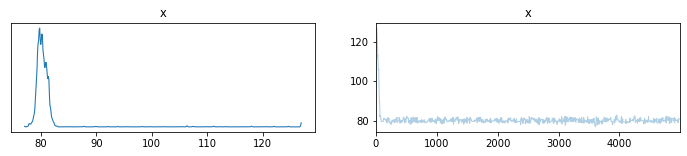

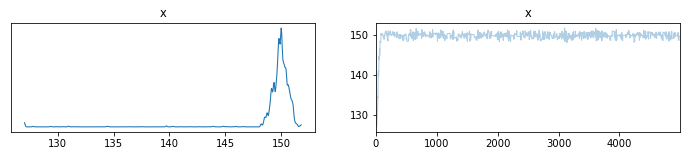

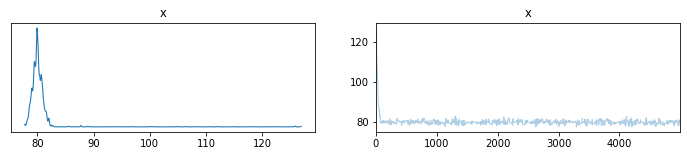

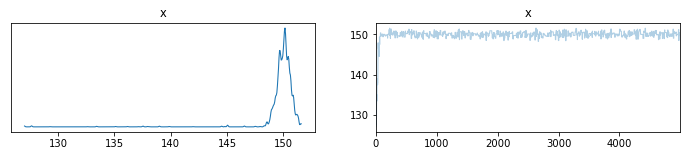

In [641]:
for i in range(len(sample_paths)):
    s = samples[i]
    az.plot_trace(s[0,start:end])
    az.plot_trace(s[1,start:end])

array([[<AxesSubplot:title={'center':'x'}>,
        <AxesSubplot:title={'center':'x'}>]], dtype=object)

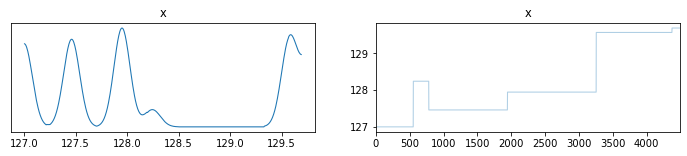

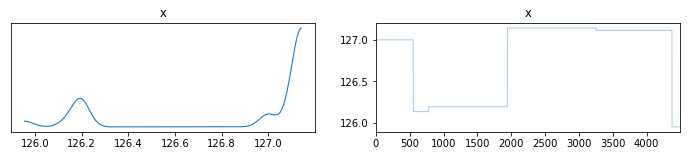

In [642]:
az.plot_trace(mlda_samples[0,start_mlda:end_mlda])
az.plot_trace(mlda_samples[1,start_mlda:end_mlda])

In [643]:
for i in range(len(sample_paths)):
    print("Level " + str(i) + ":")
    mean = np.mean(samples[i][:,start:end], axis=1)
    print("Mean = " + str(mean))
    #var = np.var(samples[i][:,start:end], axis=1)/end
    #print("Variance = " + str(var))
    print("DLE = "+ str(np.linalg.norm(mean-point)))
    print("\n")


print("MLDA :")
mean = np.mean(mlda_samples[:,start_mlda:end_mlda], axis=1)
print("Mean = " + str(mean))
print("DLE = "+ str(np.linalg.norm(mean-point)))


Level 0:
Mean = [ 80.96095108 149.57624604]
DLE = 1.0502353973666756


Level 1:
Mean = [ 80.60345696 149.77978   ]
DLE = 0.6423839614420831


Level 2:
Mean = [ 80.24387388 149.91383211]
DLE = 0.2586491358807373


MLDA :
Mean = [128.17316122 126.78913706]
DLE = 53.47333559835899


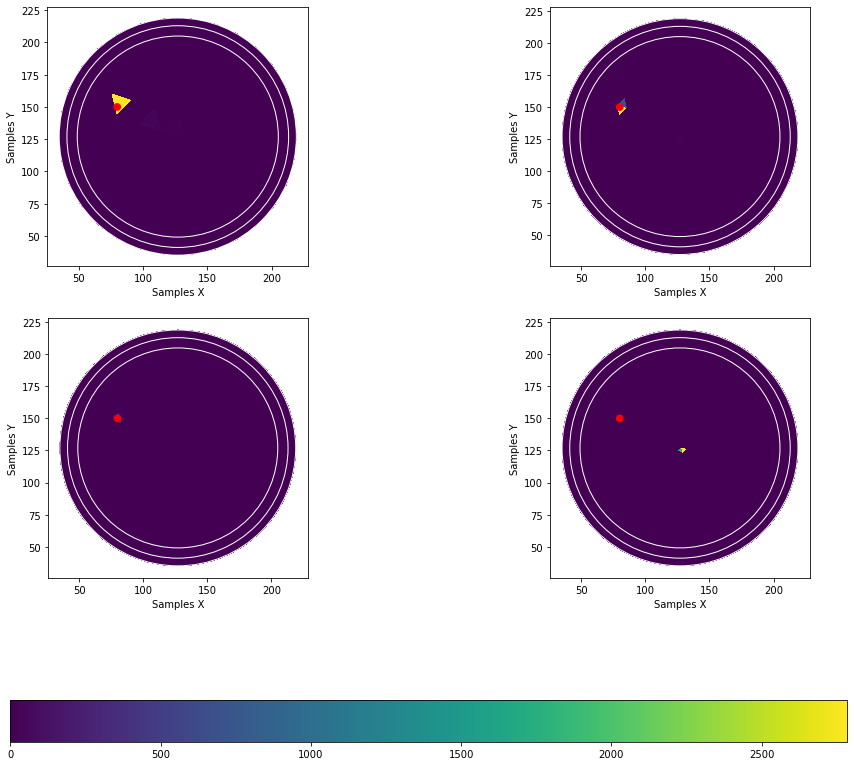

In [647]:
path_meshs = [
        "data/mesh_20_1.msh",
        "data/mesh_20_2.msh",
        "data/mesh_20_3.msh"]

fig, ax = plt.subplots(2, 2, figsize=(15,15))
fig.subplots_adjust(wspace=.5)

im = evaluations.draw_cells(path_meshs[0],samples[0][:,start:end],ax[0,0])
im = evaluations.draw_cells(path_meshs[1],samples[1][:,start:end],ax[0,1])
im = evaluations.draw_cells(path_meshs[2],samples[2][:,start:end],ax[1,0])
im = evaluations.draw_cells(path_meshs[2],mlda_samples[:,start_mlda:end_mlda],ax[1,1])

evaluations.set_ax(ax[0,0],point)
evaluations.set_ax(ax[0,1],point)
evaluations.set_ax(ax[1,0],point)
evaluations.set_ax(ax[1,1],point)

fig.colorbar(im, ax=ax.ravel().tolist(),orientation="horizontal")


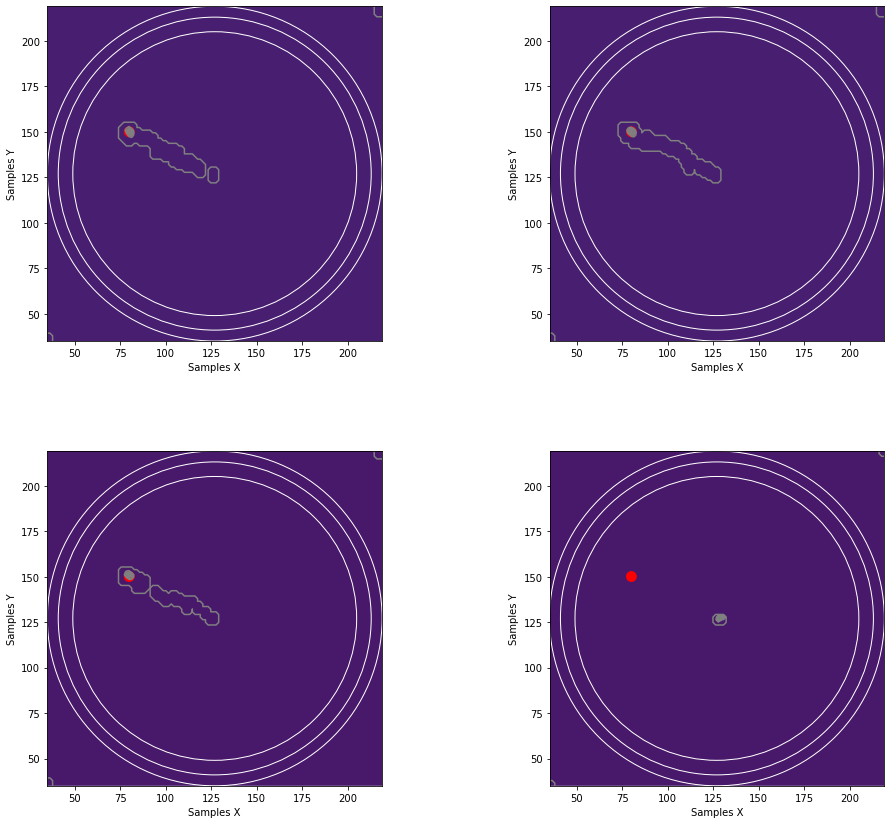

In [645]:
fig, ax = plt.subplots(2, 2, figsize=(15,15))
fig.subplots_adjust(wspace=.5)

im = evaluations.draw_densities(samples[0][:,start:end],ax[0,0])
im = evaluations.draw_densities(samples[1][:,start:end],ax[0,1])
im = evaluations.draw_densities(samples[2][:,start:end],ax[1,0])
im = evaluations.draw_densities(mlda_samples[:,start_mlda:end_mlda],ax[1,1])

#point = (80,150)
evaluations.set_ax(ax[0,0],point)
evaluations.set_ax(ax[0,1],point)
evaluations.set_ax(ax[1,0],point)
evaluations.set_ax(ax[1,1],point)

#fig.colorbar(im, ax=ax.ravel().tolist(),orientation="horizontal")


In [646]:
moments = []

for i in range(len(sample_paths)):
    fin = h5py.File(sample_paths[i])
    moments.append(np.array( fin['/samples'][2] ))
    fin.close()

fin = h5py.File('/home/anne/Masterarbeit/masterarbeit/results/samples_2d_arb_mlda.h5')
moments.append(np.array( fin['/samples'][2] ))
fin.close()

data_labels = ["Level 1", "Level 2", "Level 3", "MLDA"]

az.plot_density(moments, data_labels=data_labels)

az.plot_trace(moments[0])
az.plot_trace(moments[1])
az.plot_trace(moments[2])
az.plot_trace(moments[3])

IndexError: Index (2) out of range for (0-1)

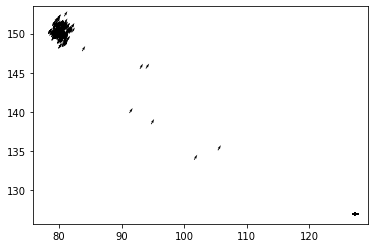

In [ ]:
from tkinter import S
import utility_functions

samples = []

for i in range(len(sample_paths)):
    fin = h5py.File(sample_paths[i])
    samples.append(np.array( fin['/samples']))
    fin.close()
    
fig, ax = plt.subplots()

fin = h5py.File('/home/anne/Masterarbeit/masterarbeit/results/samples_2d_arb_mlda.h5')
s = np.array( fin['/samples'] )
fin.close()

x = s[0]
y = s[1]
u = []
v = []
for i in range(len(s[0])):
    d = utility_functions.get_dipole_orientation(2,s[2][i])
    u.append(d[0]*1)
    v.append(d[1]*1)
    
q = ax.quiver(x, y, u, v)
plt.show()